# Lecture 3. Introducing the Single Neuron Model

---



## The Perceptron 

In this notebook we introduce a specific type of single neuron model called the *perceptron*. For supplemental videos on this topic see:
1. [Single Neuron Model and Perceptron Theory Video](https://www.youtube.com/watch?v=SmEKxsd_67w&t=1935s)
2. [Implementing the Perceptron Code Video](https://www.youtube.com/watch?v=NpTfxpHlHJ4&t=1581s)

The perceptron is a single neuron model with the *sign* activation function as depicted in the figure below.

<p align="center">
    <img src="ThePerceptronImage.png" width="500">
</p>


We will implement and train this model on the Pima Indian Diabete dataset (which I have stored in a Datasets folder). If you have cloned my Github repository of my project go ahead and get started by running the following code in the cell below.


---

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Read the iris dataset into a pandas DataFrame object
df = pd.read_csv("Datasets/diabetes.csv")

---

## Pima Indians Diabetes Dataset Overview

In this examples and many ones in my next sessions, we are going to use the Pima Indian Diabetes Dataset. 

The Pima Indians Diabetes Dataset originates from the National Institute of Diabetes and Digestive and Kidney Diseases, focusing on the diagnostic prediction of diabetes among Pima Indian women aged 21 and above. It comprises several medical predictor variables, such as the number of pregnancies, BMI, insulin level, and age, alongside one target variable, 'Outcome', to indicate the presence or absence of diabetes.

Acknowledged for its creation by Smith et al. (1988), this dataset provides a valuable resource for developing machine learning models to predict diabetes. It challenges researchers to apply advanced analytics in medical diagnosis, aiming to enhance patient care by accurately identifying those at risk of diabetes.

In [3]:
# Store the desired outcome values in the numpy array y
y = df.Outcome.values

# Convert each entry of y with 0 to -1 and 1 to 1
y = np.where(y == 0, -1, 1)

# Store the desired feature measurements in the matrix X
X = df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]].values

## The Perceptron Algorithm

The Perceptron is a fundamental building block of artificial neural networks and a simple algorithm for binary classification tasks. It is a type of linear classifier that learns a decision boundary to separate two classes in a feature space.

The Perceptron algorithm works as follows:

1. Initialization:
   - Initialize the weights (w) of the Perceptron randomly, including the bias term.
   - Set the learning rate (eta) and the number of epochs.

2. Training:
   - For each epoch:
     - For each training example (x, y):
       - Calculate the predicted output by taking the dot product of the input features (x) and the weights (w), and adding the bias term.
       - If the predicted output doesn't match the actual label (y), update the weights by subtracting the product of the learning rate, the input features (x), and the difference between the predicted output and the actual label.
   - If the weights converge (i.e., no misclassifications occur in an epoch), training can be stopped early.

3. Prediction:
   - For a new input example (x), calculate the dot product of the input features (x) and the learned weights (w), and add the bias term.
   - Apply a step function to the result. If the output is greater than or equal to 0, predict the positive class (1); otherwise, predict the negative class (-1).

The Perceptron algorithm learns the optimal weights that minimize the classification errors on the training data. It does this by iteratively updating the weights based on the misclassified examples, moving the decision boundary towards the correct classification.

However, the Perceptron has some limitations:
- It can only learn linearly separable patterns. If the classes are not linearly separable, the Perceptron will not converge.
- It is sensitive to the learning rate and the number of epochs. Choosing appropriate values for these hyperparameters is important for effective learning.
- It does not provide probabilistic outputs or handle multi-class classification directly.

Despite its simplicity, the Perceptron laid the foundation for more advanced neural network architectures and continues to be a valuable learning tool in understanding the basics of machine learning.

### 1. Construction of the Perception

In [4]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs=50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        

### 2. Training of the Perceptron

In [5]:
# Instantiate one instance of the Perceptron class
clf = Perceptron(epochs = 10_000)

# Call the train method to train the weights and bias of the given instance
clf.train(X, y)

# The training lasts around 10 minutes on my own machine.
# I've tried both 100_000 and 10_000 epochs, but the difference in accuracy is no much different.

After training has finished we can call the ```Perceptron``` class ```predict``` method to view its current predictions given input features. We can quickly view these predictions on the entries in ```X``` by running the following code in the cell below.

In [6]:
from sklearn.metrics import accuracy_score

# Predict labels on the features in X
y_hat = clf.predict(X)

# Compare y_hat and y
print(y == y_hat)

# Calculate the accuracy
accuracy = accuracy_score(y, y_hat)
print("Accuracy: {:.2f}%".format(accuracy * 100))

[ True  True  True  True  True  True False False  True False  True  True
 False  True  True  True  True False False False False  True  True False
  True  True  True  True False  True  True  True  True  True  True False
 False False False  True False False  True  True False  True False  True
 False  True  True  True  True  True False  True  True  True False  True
  True  True  True False False  True False  True  True False False False
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True False False False
  True  True  True  True  True False  True  True  True False  True False
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True False  True False False  True  True
  True  True  True False  True  True  True False  True  True  True False
 False  True  True False False  True False  True  True False  True  True
  True  True  True  True False  True False  True Fa

### 3. Plot the Missclassifications

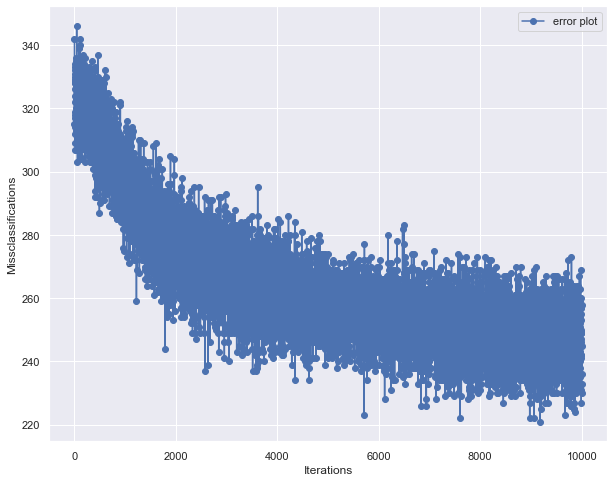

In [7]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(clf.errors_)+1), clf.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

The plot doesn't look good. We could try to plot the moving average.

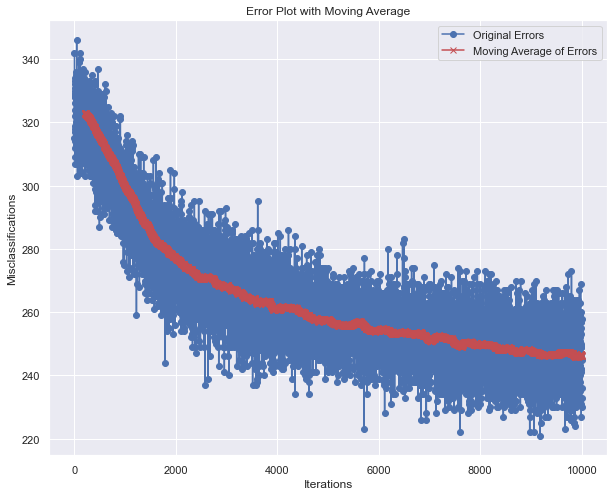

In [13]:
# Sample data: clf.errors_ (You should use your actual error data here)
errors = clf.errors_

# Convert errors to a pandas Series
errors_series = pd.Series(errors)

# Calculate the moving average with a window size, e.g., 10
moving_average = errors_series.rolling(window=200).mean()

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(errors)+1), errors, marker="o", label="Original Errors")
plt.plot(range(1, len(errors)+1), moving_average, marker='x', linestyle='-', color='r', label="Moving Average of Errors")
plt.xlabel("Iterations")
plt.ylabel("Misclassifications")
plt.title("Error Plot with Moving Average")
plt.legend()
plt.show()


With a window of 200, we can see more clear that the error is getting smaller.

---

### Conclusion
We have applied the Perceptron algorithm to classify the presence of diabetes based on various health measurements. The Perceptron model achieved an accuracy of around 71% on this dataset.

However, it's important to note that the Perceptron algorithm assumes linear separability of the data. In this case, the accuracy of 71% suggests that the diabetes dataset may not be perfectly linearly separable. When the data is not linearly separable, the Perceptron algorithm may struggle to find a satisfactory decision boundary, leading to suboptimal classification performance.

To further explore the limitations of the Perceptron and investigate the impact of linear separability, I encourage you to experiment with different subsets of the diabetes dataset or consider other datasets with varying degrees of linear separability. For example, you could try applying the Perceptron to classify different types of diabetes or explore the relationship between specific health measurements and diabetes outcomes.

Additionally, it would be valuable to compare the Perceptron's performance with other classification algorithms, such as logistic regression, decision trees, or support vector machines. These algorithms have different assumptions and can handle non-linearly separable data to varying extents.

Furthermore, I recommend exploring feature engineering techniques to create new features or transform existing ones, which may improve the linear separability of the data and potentially enhance the Perceptron's performance.

By conducting these experiments and analyzing the results, you can gain a deeper understanding of the strengths and limitations of the Perceptron algorithm and develop insights into handling complex, real-world classification problems.